[Decision Tree with example
](https://www.saedsayad.com/decision_tree.htm)

# Import libraries

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
from sklearn import tree

# Mount Drive and load dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Load data from Coding Dojo File Structure
path = 'C:/Users/ISHMO_CT/Desktop/projects/classification/Iris.csv'
df = pd.read_csv(path)
df.head()
# df.shape

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Find the Class Names and Determine How Balanced the Classes Are

In [5]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['Species'].value_counts(normalize = True) 

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

We can see from the output above that our data set has three classes of iris species:



1.  Iris-setosa
2.  Iris-virginica
3. Iris-versicolor.

We can also see that our data set is perfectly balanced. (That is quite unusual, but this data set is specifically used for training purposes, so it is a rare case of perfectly balanced data).

# Arrange Data into a Features Matrix and Target Vector

In [7]:
df.columns

x= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:

# Define target and features
y = df['Species']

X = df.drop(columns = 'Species')
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Train Test Split (model validation)

In [9]:
len(df)

150

In [10]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)   #default test_size=0.25

In [11]:
print(len(y_train)/len(df)* 100)
print(len(y_test)/len(df)* 100)

80.0
20.0



# ​Instantiate the Model
Let's start with the default Decision Tree Classifier.  We set a random state for decision trees for reproducible results.

In [12]:
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)

# Fit the Model on Training Data

In [13]:
# Model training
#Fit on the training data
dec_tree.fit(X_train, y_train) #use labelled examples - X train and y_train. #output _ Trained model

DecisionTreeClassifier(random_state=42)

# Predict the Labels (Species of Iris Flower)

In [14]:
# Testing the model -Obtain predictions

#dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)  #test on new instances which are not labelled
test_preds

#dec_tree.predict(X_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [15]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object

In [16]:
#Decision Tree visualization
from sklearn.datasets import load_iris

In [17]:
iris=load_iris()

In [18]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
#Specifying the feature matrix (which is stored in data) and also the target vector (which is stored in target)
iris
X = iris.data
y=iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
dec_tree.predict([[2.8, 1.9, 3.09, 1.0]])

c:\Users\ISHMO_CT\.virtualenvs\classification-clgQrqWa\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica

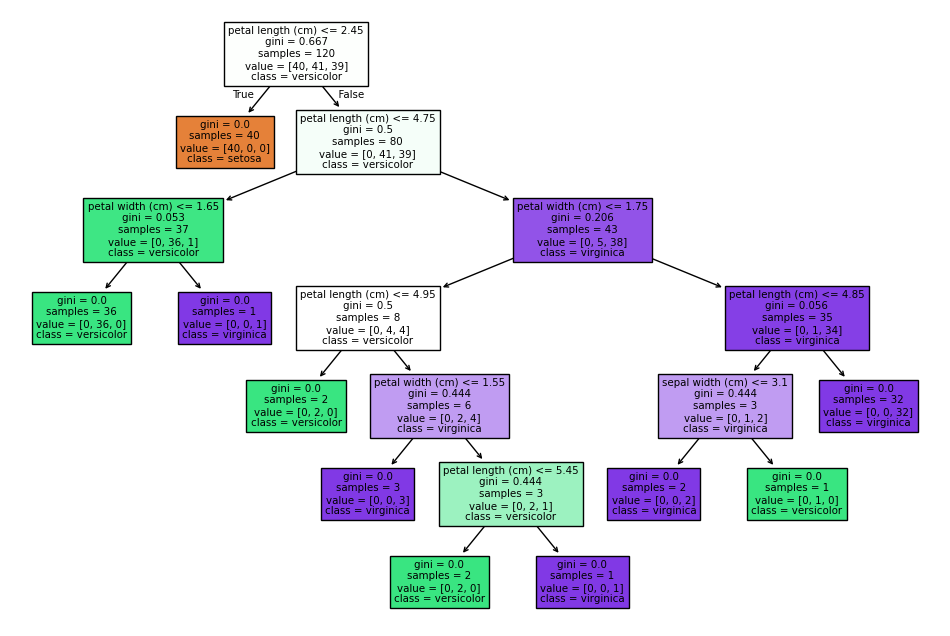

In [26]:
plt.figure(figsize=(12,8))

tree.plot_tree(dec_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077

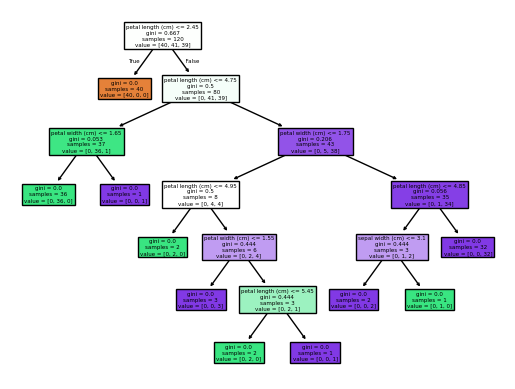

In [ ]:
tree.plot_tree(dec_tree, feature_names=iris.feature_names,  filled=True)

In [27]:
test_preds, y_test

(array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object),
 73     Iris-versicolor
 18         Iris-setosa
 118     Iris-virginica
 78     Iris-versicolor
 76     Iris-versicolor
 31         Iris-setosa
 64     Iris-versicolor
 141     Iris-virginica
 68     Iris-versicolor
 82     Iris-versicolor
 110     Iris-virginica
 12         Iris-setosa
 36         Iris-setosa
 9          Iris-setosa
 19         Iris-setosa
 56     Iris-versicolor
 104     

In [28]:
df.shape
print(len(X_train))
len(X_test)

120


30

In [29]:
#Evaluating the model - test set - actual values(y_test) and pred_values

print(classification_report(y_test, test_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [30]:
precision_score(y_test, test_preds, average = 'weighted')
precision_score(y_test, test_preds, average = 'macro')

1.0

In [31]:
confusion_matrix(y_test, test_preds)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

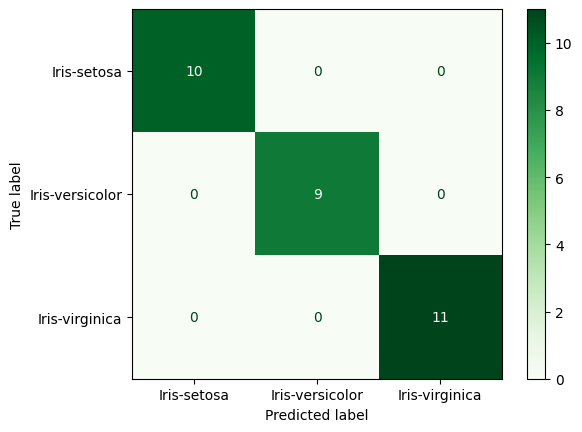

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Greens')

# Deploying the model

* Saving the model

In [35]:
#importing necessary libraries

import pickle

In [36]:
filename = 'dec_model.sav'
pickle.dump(dec_tree, open(filename, 'wb'))  #writing the model information in our filename - binary mode

In [37]:
dec_tree.predict([[2.8, 1.9, 0.9, 1.0]])

c:\Users\ISHMO_CT\.virtualenvs\classification-clgQrqWa\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [38]:
load_dec_model=pickle.load(open(filename, 'rb')) #reading the model

In [39]:
load_dec_model.predict([[2.8, 1.9, 0.9, 1.0]])

c:\Users\ISHMO_CT\.virtualenvs\classification-clgQrqWa\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

KNN classifiers

In [40]:
#importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#instantiate the object that will hold the KNN classifier

knn = KNeighborsClassifier(n_neighbors=21) #best K value - Elbow method

In [42]:
#train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [43]:
#Test the model
knn_preds= knn.predict(X_test)

In [44]:
print(classification_report(y_test, knn_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [45]:
confusion_matrix(y_test, knn_preds)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])